In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.display import Image
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/Users/yoko/.anyenv/envs/pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_train = pd.read_csv('input/train.csv', index_col='datetime', parse_dates=[0])
df_train

,y,client,close,price_am,price_pm
datetime,,,,,
2010-07-01,17,0,0,-1,-1
2010-07-02,18,0,0,-1,-1
2010-07-03,20,0,0,-1,-1
2010-07-04,20,0,0,-1,-1
2010-07-05,14,0,0,-1,-1
2010-07-06,14,0,0,-1,-1
2010-07-07,4,0,0,-1,-1
2010-07-08,10,0,0,-1,-1
2010-07-09,12,0,0,-1,-1


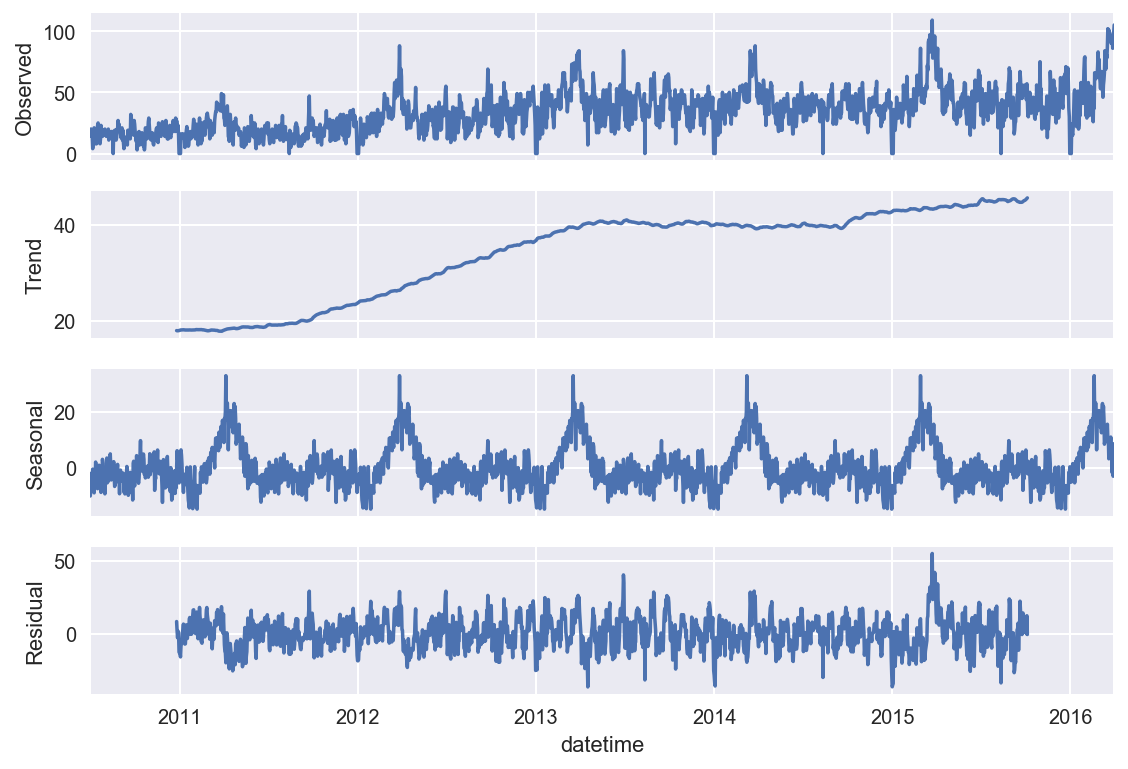

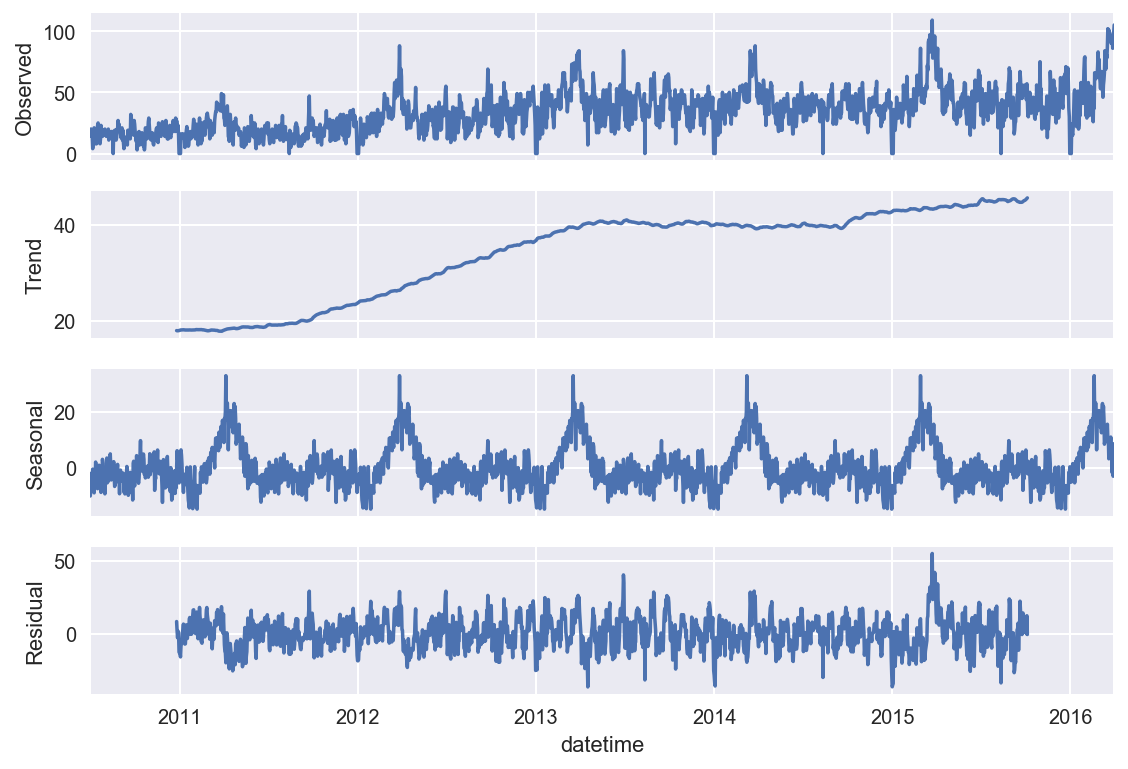

In [3]:
decompose_result = sm.tsa.seasonal_decompose(df_train.iloc[:, 0], freq=356)
decompose_result.plot()

In [28]:
df_train['month'] = df_train.index.month
df_train['day'] = df_train.index.day
df_train['weekday'] = df_train.index.weekday_name
df_train['week'] = df_train.index.week
df_train['year'] = df_train.index.year

syukujitsu = pd.read_csv('input/syukujitsu.csv')
syukujitsu = pd.to_datetime(syukujitsu['date'])
df_train['holiday'] = df_train['weekday'].isin(['Saturday', 'Sunday'])
df_train['holiday'] |= df_train.index.isin(syukujitsu)

df_train['weekday'] = df_train.index.weekday

In [5]:
df_train.groupby('month')['y'].mean()

month
1     26.586022
2     38.729412
3     58.005376
4     40.320000
5     29.709677
6     31.466667
7     29.467742
8     29.327957
9     32.305556
10    31.225806
11    29.650000
12    32.526882
Name: y, dtype: float64

In [6]:
df_train.groupby('day')['y'].mean()

day
1     36.028986
2     30.811594
3     29.724638
4     30.014493
5     28.753623
6     27.811594
7     27.985507
8     27.130435
9     26.724638
10    30.173913
11    28.246377
12    28.188406
13    30.275362
14    30.086957
15    32.768116
16    33.376812
17    31.507246
18    32.507246
19    33.289855
20    36.652174
21    35.942029
22    36.782609
23    37.840580
24    39.811594
25    40.000000
26    41.811594
27    42.797101
28    44.594203
29    45.061538
30    43.714286
31    40.756098
Name: y, dtype: float64

In [7]:
df_train.groupby('weekday')['y'].mean()

weekday
Friday       34.310000
Monday       33.826667
Saturday     41.290000
Sunday       38.330000
Thursday     30.551495
Tuesday      30.540000
Wednesday    29.840000
Name: y, dtype: float64

In [8]:
syukujitsu = pd.read_csv('input/syukujitsu.csv')
syukujitsu = pd.to_datetime(syukujitsu['date'])

In [18]:
df_train['holiday'] = df_train['weekday'].isin(['Saturday', 'Sunday'])
df_train['holiday'] |= df_train.index.isin(syukujitsu)
df_train

,y,client,close,price_am,price_pm,month,day,weekday,holiday
datetime,,,,,,,,,
2010-07-01,17,0,0,-1,-1,7,1,Thursday,False
2010-07-02,18,0,0,-1,-1,7,2,Friday,False
2010-07-03,20,0,0,-1,-1,7,3,Saturday,True
2010-07-04,20,0,0,-1,-1,7,4,Sunday,True
2010-07-05,14,0,0,-1,-1,7,5,Monday,False
2010-07-06,14,0,0,-1,-1,7,6,Tuesday,False
2010-07-07,4,0,0,-1,-1,7,7,Wednesday,False
2010-07-08,10,0,0,-1,-1,7,8,Thursday,False
2010-07-09,12,0,0,-1,-1,7,9,Friday,False


In [23]:
df_train.groupby('holiday')['y'].mean()

holiday
False    31.695225
True     39.147710
Name: y, dtype: float64

In [24]:
df_train.groupby('client')['y'].mean()

client
0    32.305013
1    50.577670
Name: y, dtype: float64

In [26]:
df_train.groupby('price_pm')['y'].mean()

price_pm
-1    14.316038
 0    30.361881
 1    41.989919
 2    52.128000
 3    61.382353
 4    71.733333
 5    66.076923
Name: y, dtype: float64

In [27]:
df_train.groupby(df_train.index.year)['y'].mean()

datetime
2010    16.298913
2011    18.991781
2012    30.500000
2013    40.320548
2014    39.665753
2015    44.597260
2016    55.714286
Name: y, dtype: float64

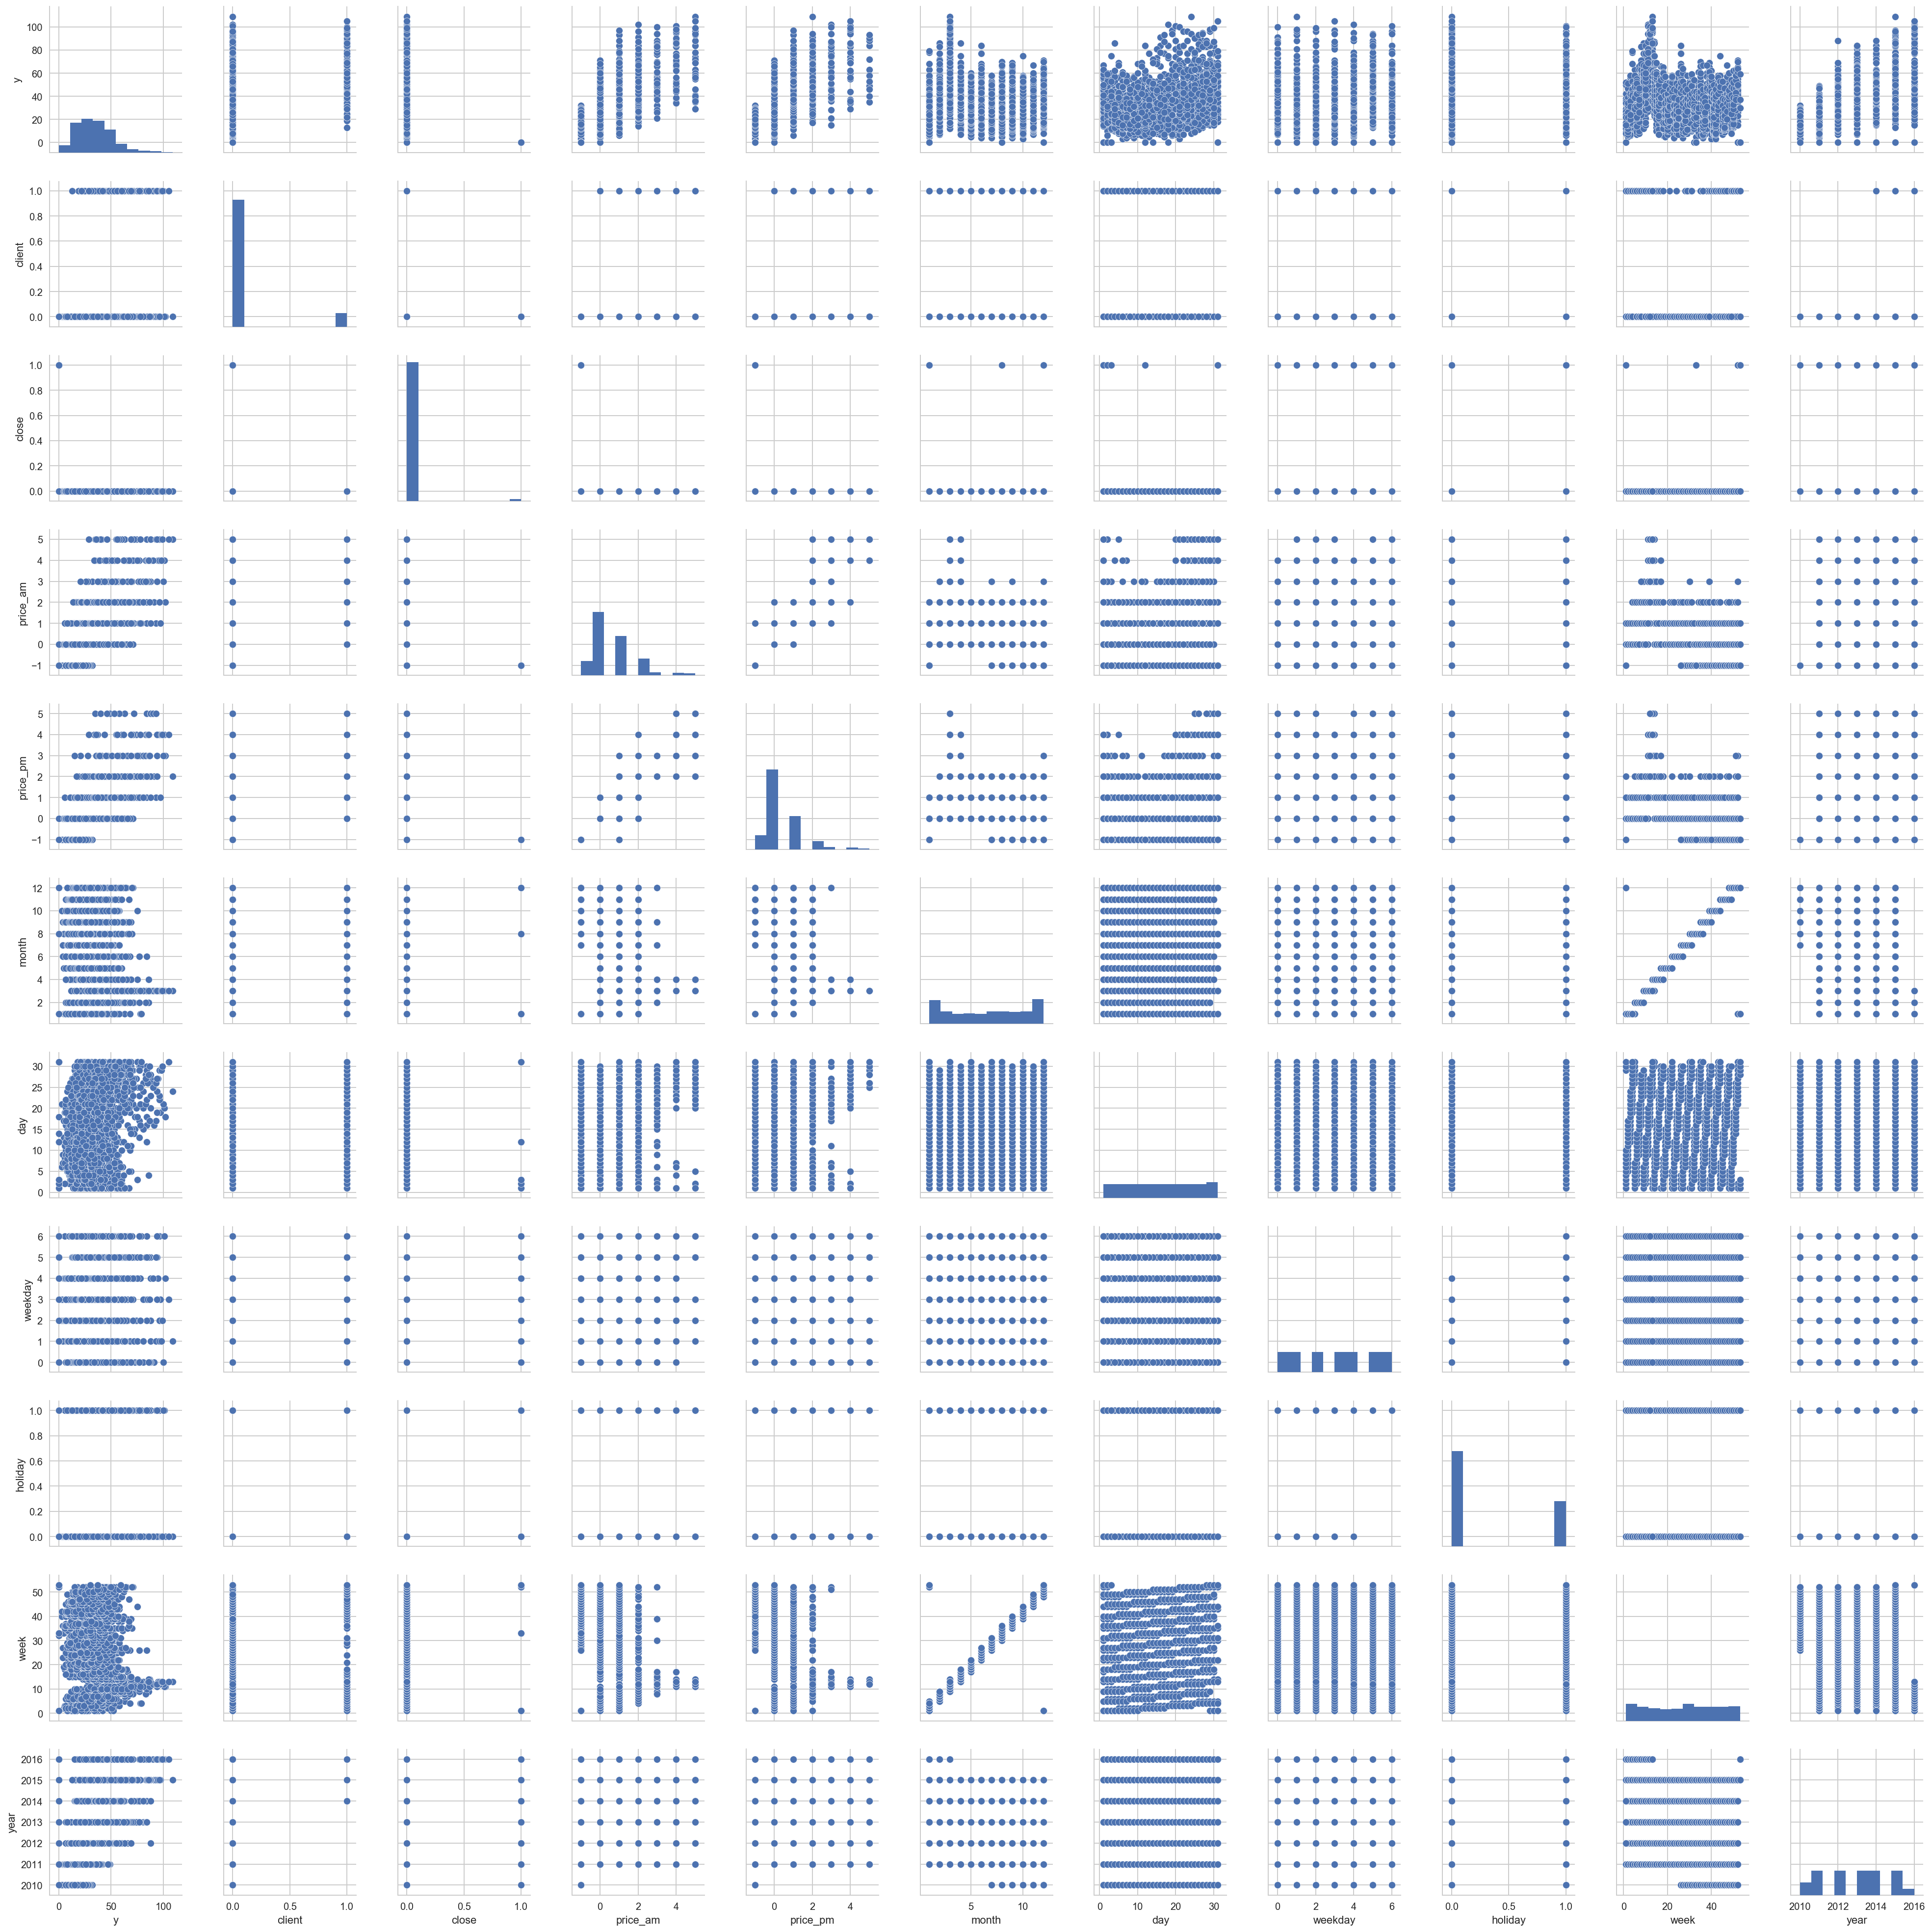

In [33]:
sns.set(style='whitegrid', context='notebook')

sns.pairplot(df_train, size=2.5)
plt.tight_layout()
plt.show()